# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. More complex dataset**

- Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



In [36]:
import numpy as np
import matplotlib.pyplot as plt 

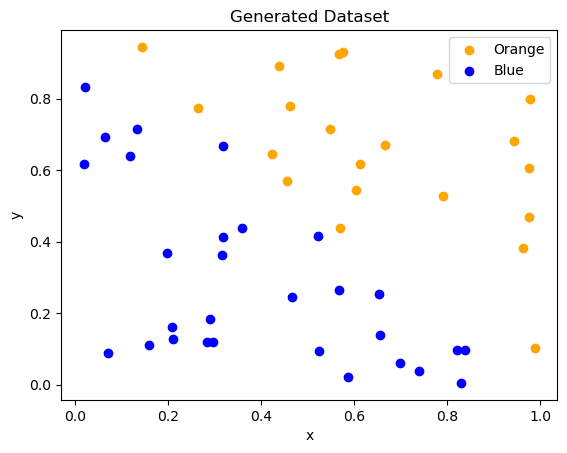

In [37]:
# Task 1
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
n = 50
np.random.seed(0)
X = np.random.rand(n, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 'orange', 'blue')

# Visualize the dataset
plt.scatter(X[y == 'orange'][:, 0], X[y == 'orange'][:, 1], color='orange', label='Orange')
plt.scatter(X[y == 'blue'][:, 0], X[y == 'blue'][:, 1], color='blue', label='Blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generated Dataset')
plt.show()

In [38]:
#Task 2
# Compute the distances between (x₀, y₀) and all points in your dataset.
#How will you calculate the distance?
#What type of distance metric can you use?
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Example point
x0, y0 = 0.5, 0.5
distances = np.array([euclidean_distance(np.array([x0, y0]), point) for point in X])
# Select a value for K
K = 5

In [39]:
# Identify the K nearest neighbors for your new point based on the distances you computed.
nearest_neighbors_indices = distances.argsort()[:K]
nearest_neighbors_labels = y[nearest_neighbors_indices]

In [40]:
# Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation? 
#Do it and explain your approach.
from collections import Counter

label_counter = Counter(nearest_neighbors_labels)
predicted_label = label_counter.most_common(1)[0][0]
print(f'The predicted label for the point ({x0}, {y0}) is {predicted_label}.')

The predicted label for the point (0.5, 0.5) is orange.


In [41]:
""" Experiment with different values of K:
Analyze how the prediction changes depending on different values for K.
What happens when K is too small? Too large?"""
for K in [1, 3, 5, 10, 20]:
    nearest_neighbors_indices = distances.argsort()[:K]
    nearest_neighbors_labels = y[nearest_neighbors_indices]
    label_counter = Counter(nearest_neighbors_labels)
    predicted_label = label_counter.most_common(1)[0][0]
    print(f'K={K}: The predicted label for the point ({x0}, {y0}) is {predicted_label}.')

K=1: The predicted label for the point (0.5, 0.5) is orange.
K=3: The predicted label for the point (0.5, 0.5) is orange.
K=5: The predicted label for the point (0.5, 0.5) is orange.
K=10: The predicted label for the point (0.5, 0.5) is orange.
K=20: The predicted label for the point (0.5, 0.5) is orange.


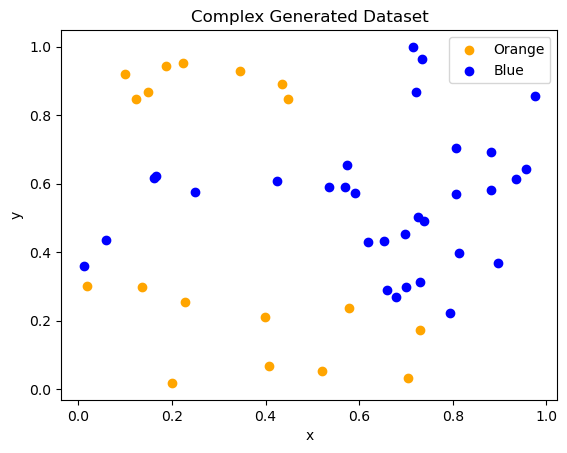

In [42]:
# Task 3 More complex dataset
"""Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).
What happens to your prediction as the dataset structure becomes more complex? """

# Generate a more complex dataset
X_complex = np.random.rand(n, 2)
y_complex = np.where(np.sin(5 * X_complex[:, 0]) + np.cos(5 * X_complex[:, 1]) > 0, 'orange', 'blue')

# Visualize the complex dataset
plt.scatter(X_complex[y_complex == 'orange'][:, 0], X_complex[y_complex == 'orange'][:, 1], color='orange', label='Orange')
plt.scatter(X_complex[y_complex == 'blue'][:, 0], X_complex[y_complex == 'blue'][:, 1], color='blue', label='Blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Complex Generated Dataset')
plt.show()

Graph behavior analysis:
1.Classification Rule:

The graph is based on a simple linear classification rule:
Points where (x + y > 1) are classified as orange.
Points where (x + y \leq 1) are classified as blue.

2.Decision Boundary:

The decision boundary is represented by the line (x + y = 1) (a diagonal line).
This line divides the unit square into two regions:
Above the line: Points belong to the orange class.
Below or on the line: Points belong to the blue class.

3.Point Distribution:

The points are uniformly distributed across the unit square ([0, 1] \times [0, 1]).
The classification is approximately balanced, with about half the points in each class due to the diagonal split of the unit square.

4.Behavior of Points Near the Boundary:

Points close to the boundary (x + y = 1) are more sensitive to small changes in their coordinates because a slight shift can change their classification.
These points can be considered as borderline points or ambiguous cases for the classifier.

5.Class Separation:

The two classes (orange and blue) are linearly separable, meaning there is a clear and straight boundary that perfectly divides the two classes.

6.Visual Representation:

The orange points are located in the upper-right region of the graph (where (x + y > 1)).
The blue points are located in the bottom-left region of the graph (where (x + y \leq 1)).
The dashed line representing (x + y = 1) visually separates the two groups.


Behavioral Insights

1.Linear Separability:
The dataset is perfectly separable by a linear decision boundary, which makes it ideal for testing simple classifiers like Logistic Regression, Linear SVM, or K-Nearest Neighbors.

2.Robustness to Noise:
The classification rule ((x + y > 1)) is deterministic and does not account for noise or overlapping regions. If noise were added to the dataset, points near the boundary might be misclassified.

3.Sensitivity to Boundary Adjustments:
The behavior of points near the boundary highlights the importance of accurately placing the decision boundary. Small adjustments to the boundary can significantly impact the classification of these points.

4.Balanced Dataset:
The approximately equal number of orange and blue points ensures that the dataset is balanced, which is favorable for training most machine learning algorithms. 

In [43]:
# Test your implementation by generating a random test set with new points. 
#Measure how well your algorithm performs (e.g., accuracy, precision, recall).

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_complex, y_complex, test_size=0.3, random_state=42)

# Predict the labels for the test set
y_pred = []
for point in X_test:
    distances = np.array([euclidean_distance(point, train_point) for train_point in X_train])
    nearest_neighbors_indices = distances.argsort()[:K]
    nearest_neighbors_labels = y_train[nearest_neighbors_indices]
    label_counter = Counter(nearest_neighbors_labels)
    predicted_label = label_counter.most_common(1)[0][0]
    y_pred.append(predicted_label)

# Evaluate the algorithm
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='orange')
recall = recall_score(y_test, y_pred, pos_label='orange')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.6
Precision: 0.0
Recall: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. 
# Which metric feels more appropriate for your specific problem?

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

# Example using Manhattan distance
distances = np.array([manhattan_distance(np.array([x0, y0]), point) for point in X]) 
print(distances)

[0.26400287 0.14764656 0.22223931 0.45418579 0.58022124 0.32061996
 0.4936412  0.84183464 0.81240145 0.6481689  0.77777691 0.31904981
 0.5216466  0.80131563 0.10718638 0.50967808 0.11228362 0.5988457
 0.22902972 0.62556838 0.20346015 0.63740572 0.33740459 0.66069114
 0.32086088 0.13159526 0.88632903 0.62981373 0.39981672 0.28926364
 0.73065528 0.51814664 0.43469247 0.72389195 0.7418465  0.50780826
 0.58160661 0.70007579 0.59699648 0.58513208 0.26775383 0.62832462
 0.30121196 0.42930754 0.50524269 0.34884143 0.58452934 0.52740255
 0.56640539 0.82424455]


---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$). Your goal is to:

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)



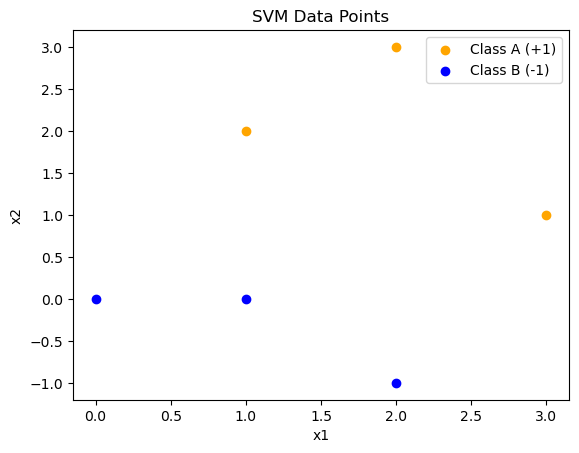

In [45]:
# 1.1 
X_svm = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
y_svm = np.array([1, 1, 1, -1, -1, -1])

plt.scatter(X_svm[y_svm == 1][:, 0], X_svm[y_svm == 1][:, 1], color='orange', label='Class A (+1)')
plt.scatter(X_svm[y_svm == -1][:, 0], X_svm[y_svm == -1][:, 1], color='blue', label='Class B (-1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM Data Points')
plt.show()

Graph Behavior

1.Data Representation:
The graph visualizes six data points in a 2D space, where:
Class A (+1) is represented by orange points.
Class B (-1) is represented by blue points.
Each point corresponds to a pair of coordinates ((x_1, x_2)).

2.Class Clustering:
The orange points ((Class A)) are clustered in the upper-right region of the graph.
The blue points ((Class B)) are clustered in the lower-left region of the graph.
These clusters suggest a clear separation between the two classes.

3.Linear Separability:
The two classes appear visually linearly separable, meaning a straight line can divide the classes without overlap or misclassification.
This makes the dataset suitable for a hard-margin Support Vector Machine (SVM).

4.Balanced Dataset:
The dataset is evenly distributed, with three points in each class ((+1) and (-1)).
This balance ensures that both classes are equally represented, making it easier to train a classifier without bias.

5.Class Boundaries:
A potential decision boundary (not yet drawn) would likely lie between the two clusters, maximizing the margin between the closest points (support vectors) from each class.


Behavioral Observations
1.Clustering and Separation:
The clustering behavior of the two classes makes it straightforward to identify a decision boundary.
The decision boundary would likely be influenced by the points closest to the other class (support vectors).

2.Sensitivity to Noise:
Since the points are well-separated, the dataset is robust to small variations. However, introducing noise (e.g., overlapping points) could make classification harder and might require a soft-margin SVM.

3.Support Vectors:
In SVM classification, the points closest to the boundary will act as support vectors. These points will determine the position and orientation of the decision boundary. 

In [46]:
#2.3 
beta = np.array([1, -1])
beta_0 = 0

for i, (x_i, y_i) in enumerate(zip(X_svm, y_svm)):
    margin_value = y_i * (np.dot(beta, x_i) + beta_0)
    print(f'Point {i+1}: Margin value = {margin_value}, Satisfied = {margin_value >= 1}')

Point 1: Margin value = -1, Satisfied = False
Point 2: Margin value = -1, Satisfied = False
Point 3: Margin value = 2, Satisfied = True
Point 4: Margin value = -1, Satisfied = False
Point 5: Margin value = -3, Satisfied = False
Point 6: Margin value = 0, Satisfied = False


In [47]:
# 2.4 
beta = np.array([2, 2])
beta_0 = -4

for i, (x_i, y_i) in enumerate(zip(X_svm, y_svm)):
    margin_value = y_i * (np.dot(beta, x_i) + beta_0)
    print(f'Point {i+1}: Margin value = {margin_value}, Satisfied = {margin_value >= 1}')
# srdh 

Point 1: Margin value = 6, Satisfied = True
Point 2: Margin value = 2, Satisfied = True
Point 3: Margin value = 4, Satisfied = True
Point 4: Margin value = 2, Satisfied = True
Point 5: Margin value = 2, Satisfied = True
Point 6: Margin value = 4, Satisfied = True


In [48]:
# 2.5 
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='linear', C=1e10)
svm_model.fit(X_svm, y_svm)

# Get the parameters
beta = svm_model.coef_[0]
beta_0 = svm_model.intercept_[0]

print(f'Estimated parameters: beta = {beta}, beta_0 = {beta_0}')

Estimated parameters: beta = [0.49984 0.99968], beta_0 = -1.4994133333333337



---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = +1 $
- $ x_8 = [3, -2] $  with $y_8 = -1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.4: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


In [49]:
#3.1 
# Add new points to the dataset
X_svm = np.vstack([X_svm, [1, 3], [3, -2]])
y_svm = np.append(y_svm, [1, -1])

# Compute slack variables
slack_variables = np.maximum(0, 1 - y_svm * (np.dot(X_svm, beta) + beta_0))
print(f'Slack variables: {slack_variables}')

Slack variables: [0.         0.00021333 0.00021333 0.00042667 0.         0.
 0.         0.        ]


In [50]:
# 3.3 
violating_points_indices = np.where(slack_variables > 0)[0]
print(f'Points that violate the margin: {violating_points_indices}')

Points that violate the margin: [1 2 3]


In [51]:
# 3.4 
total_slack = np.sum(slack_variables)
print(f'Total slack: {total_slack}')

Total slack: 0.0008533333333335946


# Markdown
### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is:

$$
 \\text{minimize} \\quad \\frac{1}{2} \\|\\beta\\|^2 + C \\sum_{i=1}^{n} \\xi_i 
$$

subject to :

$$
 y_i (\\beta \\cdot x_i + b) \\geq 1 - \\xi_i \\quad \\forall i 
$$

$$
 \\xi_i \\geq 0 \\quad \\forall i 
$$

Where, 

1. $ \\frac{1}{2} \\|\\beta\\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \\sum_{i=1}^{n} \\xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\\beta \\cdot x_i + b) \\geq 1 - \\xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \\xi_i \\geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassification.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors?**

**Solution:**
> Increasing C puts more emphasis on minimizing classification errors, potentially leading to a smaller margin. Decreasing C puts more emphasis on maximizing the margin, potentially allowing more classification errors.

Let's see this in practice using a Python example with `sklearn`.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate a dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# SVM with a low value of C
clf_low_C = SVC(kernel='linear', C=0.01)
clf_low_C.fit(X, y)

# SVM with a high value of C
clf_high_C = SVC(kernel='linear', C=100)
clf_high_C.fit(X, y)

# Plotting decision boundaries
def plot_svm_decision_boundary(clf, X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax.set_title(title)

    # Plot the decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_svm_decision_boundary(clf_low_C, X, y, axs[0], 'SVM with low C (C=0.01)')
plot_svm_decision_boundary(clf_high_C, X, y, axs[1], 'SVM with high C (C=100)')
plt.show()
``` 

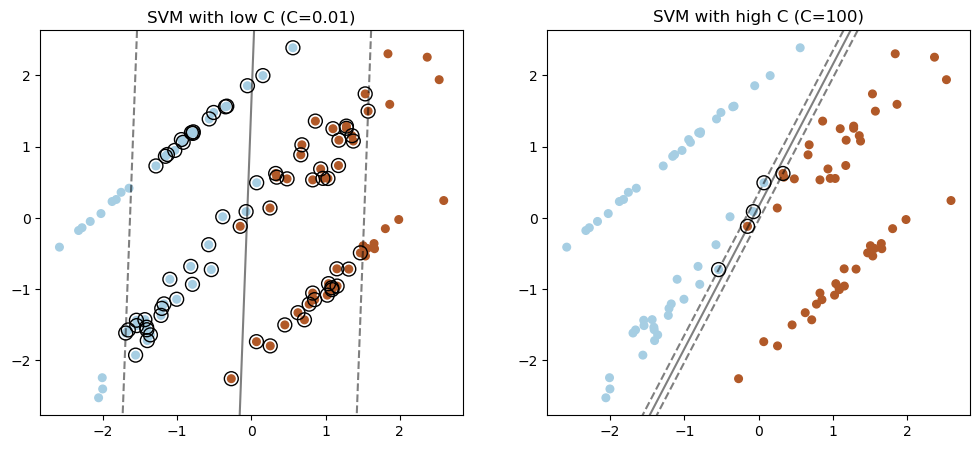

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate a dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# SVM with a low value of C
clf_low_C = SVC(kernel='linear', C=0.01)
clf_low_C.fit(X, y)

# SVM with a high value of C
clf_high_C = SVC(kernel='linear', C=100)
clf_high_C.fit(X, y)

# Plotting decision boundaries
def plot_svm_decision_boundary(clf, X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax.set_title(title)

    # Plot the decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_svm_decision_boundary(clf_low_C, X, y, axs[0], 'SVM with low C (C=0.01)')
plot_svm_decision_boundary(clf_high_C, X, y, axs[1], 'SVM with high C (C=100)')
plt.show()


Graph Analysis

1.Graph Overview:
Low  (Left Graph): Focuses on maximizing the margin, resulting in a wider margin but allowing for more misclassifications.
High  (Right Graph): Focuses on minimizing classification errors, resulting in a narrower margin and tighter boundary.

2.Decision Boundary Behavior:
Low : Encourages a smooth boundary, tolerates misclassifications, and prioritizes generalization.
High : Creates a tightly fitted boundary, minimizes errors, but risks overfitting and reduced margin.

3.Trade-offs Between Low and High :
Low : Generalizes better, less sensitive to noise, but allows training misclassifications.
High : Fits training data well, minimizes errors, but risks overfitting and is sensitive to noise.

4.Support Vectors:
Low : Uses more support vectors to maximize margin.
High : Uses fewer support vectors to minimize errors.

5.Key Insights:
-controls the balance between generalization (large margin) and accuracy (minimizing errors).
-Low : Better generalization.
-High : Better training accuracy but risks overfitting

Left Graph: SVM with Low 
Behavior:

1. Focus on Margin Maximization:
A low  value prioritizes maximizing the margin (distance between the decision boundary and the closest training points, i.e., support vectors).
The model tolerates more misclassified points in the training dataset in order to achieve a larger margin.

2. Smooth Decision Boundary:
The decision boundary is smooth and less influenced by individual data points.
Misclassified points are visible, as some points fall on the wrong side of the margin or decision boundary.

3. Generalization Ability:
The wider margin suggests that the model is likely focusing on generalization, making it more robust to unseen data (at the cost of training accuracy).

4. Support Vectors:
More data points are considered support vectors, as the model tries to maximize the margin by including points farther away from the ideal boundary.

Right Graph: SVM with High 
Behavior:

1. Focus on Error Minimization:
A high  value prioritizes minimizing classification errors on the training dataset.
The model adjusts the decision boundary tightly around the data points to ensure most points are correctly classified.

2. Tighter Decision Boundary:
The decision boundary is more rigid and closely follows the data points.
The margin is narrower compared to the low  case, as the model sacrifices margin width to correctly classify as many points as possible.

3. Overfitting Risk:
The tight fitting of the boundary suggests a risk of overfitting, meaning the model may perform poorly on unseen data due to its sensitivity to the training points.
The model may perform well on the training dataset but lack robustness.

4. Support Vectors:
Fewer support vectors are used, as the model focuses on minimizing errors and only includes points closest to the decision boundary.

Key Insights

1. Low :
Prioritizes generalization by allowing some training errors.
Suitable for datasets with noise or where overfitting is a concern.

2. High :
Prioritizes training accuracy by minimizing errors.
Suitable for datasets with clear separability and little noise but risks overfitting.